In [ ]:
!pip install h5py
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
!pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
!pip install mne

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 1.0 MB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
   --- ------------------------------------ 0.7/7.4 MB 15.5 MB/s eta 0:00:01
   -------- ------------------------------- 1.5/7.4 MB 16.1 MB/s eta 0:00:01
   ------------ --------------------------- 2.3/7.4 MB 16.2 MB/s eta 0:00:01



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
import h5py
import os
import matplotlib.pyplot as plt
import mne 

In [95]:
def get_dataset_name(filename_with_dir):
    filename_without_dir = filename_with_dir.split('/')[-1]
    temp = filename_without_dir.split('_')[:-1]
    dataset_name = '_'.join(temp)  
    return dataset_name

filename_path = "C:/Users/jagod/Desktop/UNI/BlockIV/DL/Seminar/ass2/data/Intra/train/rest_105923_1.h5"


with h5py.File(filename_path, 'r') as f:
    dataset_name = get_dataset_name(filename_path)
    matrix = f.get(dataset_name)[()]
    print(type(matrix))
    print(matrix.shape)


<class 'numpy.ndarray'>
(248, 35624)


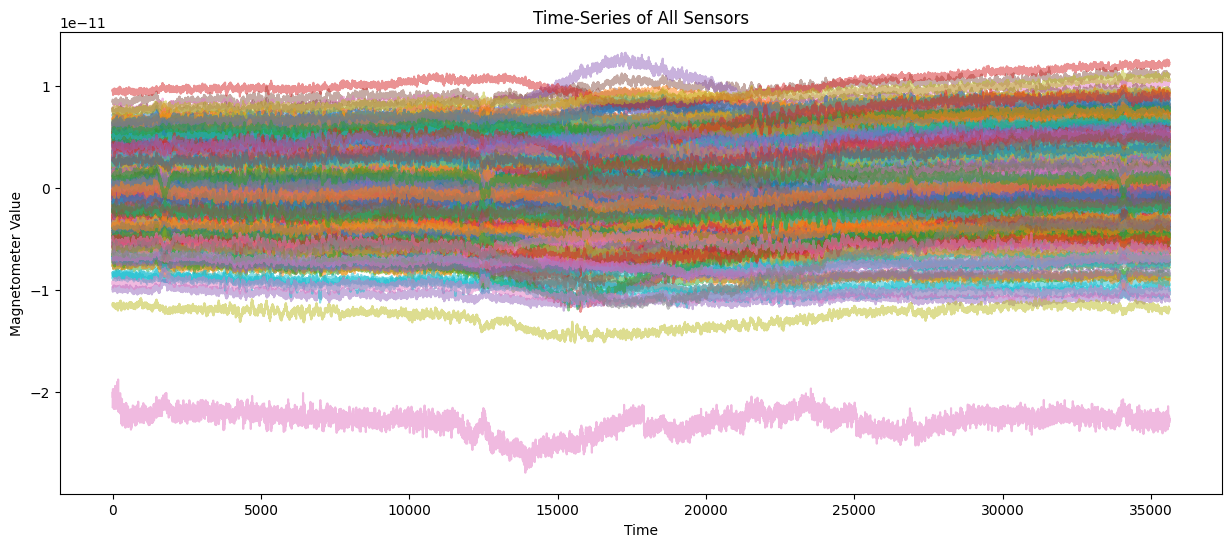

In [ ]:
plt.figure(figsize=(15, 6))

for i in range(matrix.shape[0]):  # 248 sensors (rows)
    plt.plot(matrix[i], alpha=0.5)  # `alpha` adds transparency to avoid overlap

plt.xlabel('Time')
plt.ylabel('Magnetometer Value')
plt.title('Time-Series of All Sensors')
plt.show()


In [113]:
data_dir = 'C:/Users/jagod/Desktop/UNI/BlockIV/DL/Seminar/ass2/data/Intra/train'

# File listing
files = [f for f in os.listdir(data_dir) if f.endswith('.h5')]

# Preallocate lists
raws = []     # MNE Raw objects
labels = []   # Task labels

# Constants
sfreq = 2034  # Hz >> for downsampling later
n_channels = 248 # channel = sensor
ch_names = [f'MEG {i:03d}' for i in range(n_channels)]
ch_types = ['mag'] * n_channels
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# extract full task label (e.g., task_motor, rest)
def get_task_label(filename):
    parts = filename.split('_')
    if parts[0] == 'rest':
        return 'rest'
    elif parts[0] == 'task':
        label_parts = []
        for part in parts[1:]:
            if part.isdigit():
                break
            label_parts.append(part)
        return '_'.join(label_parts)
    else:
        return 'unknown'


# extract dataset name inside HDF5 file
def get_dataset_name(filename):
    return '_'.join(filename.split('_')[:-1])

# Loop through files
for fname in sorted(files):
    fpath = os.path.join(data_dir, fname)
    task_label = get_task_label(fname)

    with h5py.File(fpath, 'r') as f:
        dataset_name = get_dataset_name(fname)
        data = f[dataset_name][()]  # shape: (248, 35624)

    # Create MNE Raw object
    raw = mne.io.RawArray(data, info)

    # Store
    raws.append(raw)
    labels.append(task_label)


Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623

In [116]:
print(f"Number of recordings: {len(raws)}")
print(f"Unique tasks: {set(labels)}")
print(f"Info: {raw.info}")
data, times = raw[:, :]  # shape: (n_channels, n_times)
print("Min value:", data.min())
print("Max value:", data.max())


Number of recordings: 32
Unique tasks: {'motor', 'story_math', 'rest', 'working_memory'}
Info: <Info | 7 non-empty values
 bads: []
 ch_names: MEG 000, MEG 001, MEG 002, MEG 003, MEG 004, MEG 005, MEG 006, ...
 chs: 248 Magnetometers
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1017.0 Hz
 meas_date: unspecified
 nchan: 248
 projs: []
 sfreq: 2034.0 Hz
>
Min value: -1.6864036556096806e-10
Max value: 1.735352139764501e-11


Effective window size : 1.007 (s)
Plotting power spectral density (dB=True).


C:\Users\jagod\AppData\Local\Temp\ipykernel_25408\574445968.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=125).plot(picks="data", exclude="bads", amplitude=False)
c:\Users\jagod\Desktop\UNI\BlockIV\DL\Seminar\ass2\env\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


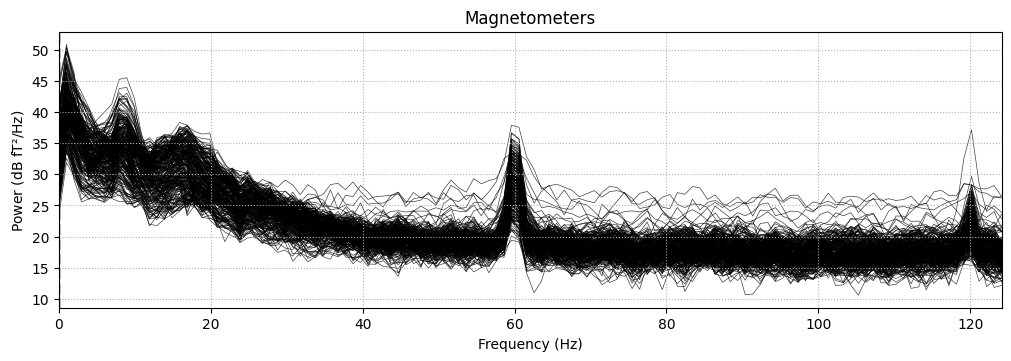

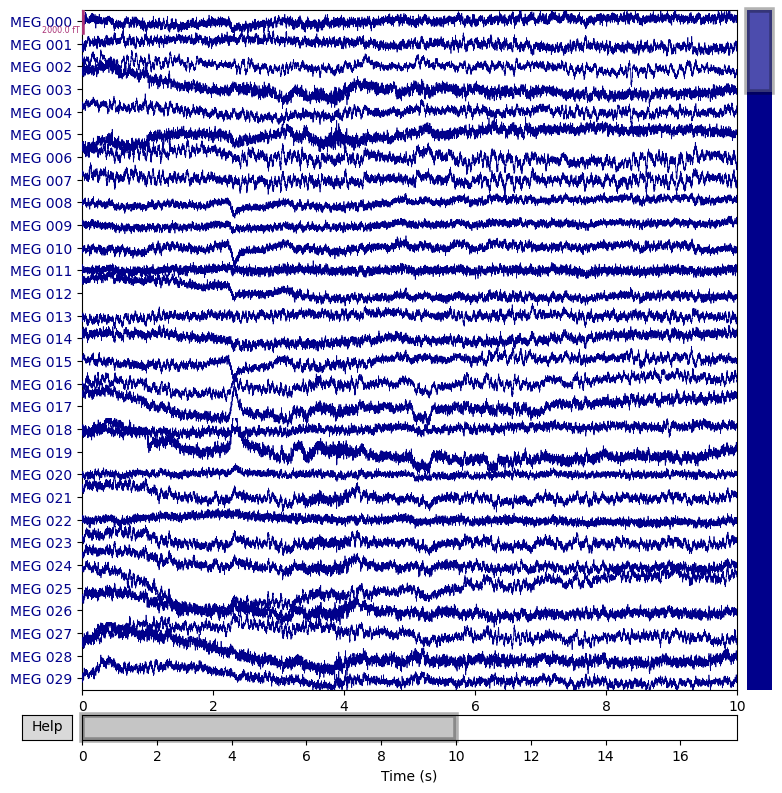

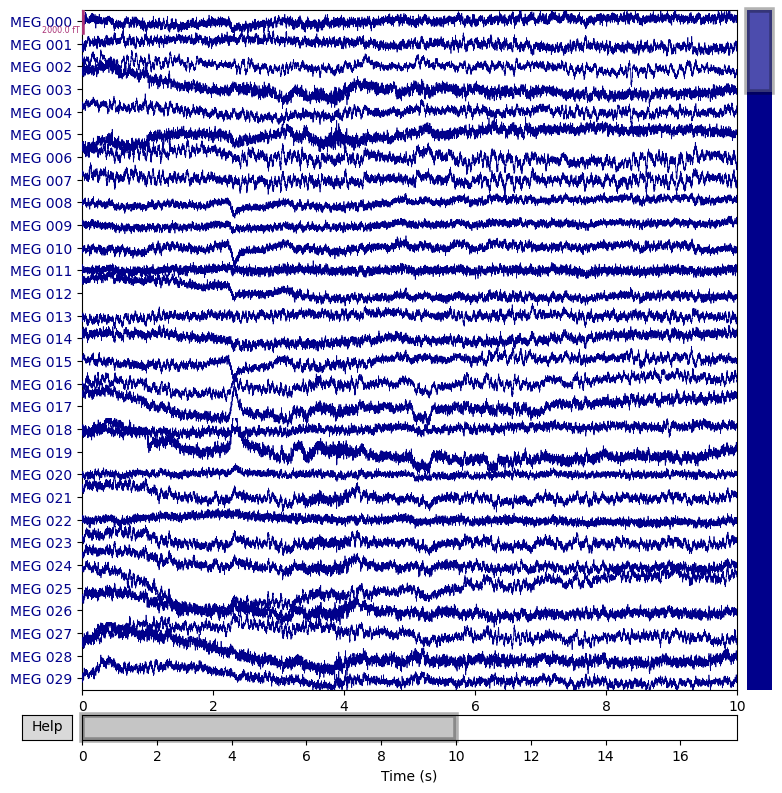

In [117]:
# the power spectral density of each channel (neuro-stuff that I dont get yet ;) )
raw.compute_psd(fmax=125).plot(picks="data", exclude="bads", amplitude=False)
# plot of given nr of channels
raw.plot(n_channels=30)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(0, 1))

#scaling for each Raw object in 'raws' list
#for raw in raws:
   # data, times = raw[:, :] 
   # scaled_data = scaler.fit_transform(data.T).T  
   # raw_scaled = mne.io.RawArray(scaled_data, raw.info)
   # raw = raw_scaled


In [119]:
raw.resample(250)


<RawArray | 248 x 4379 (17.5 s), ~8.5 MiB, data loaded>

In [120]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: MEG 000, MEG 001, MEG 002, MEG 003, MEG 004, MEG 005, MEG 006, ...
 chs: 248 Magnetometers
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 248
 projs: []
 sfreq: 250.0 Hz
>


Effective window size : 8.192 (s)


Plotting power spectral density (dB=True).


C:\Users\jagod\AppData\Local\Temp\ipykernel_25408\2600081341.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=125).plot(picks="data", amplitude=False)
c:\Users\jagod\Desktop\UNI\BlockIV\DL\Seminar\ass2\env\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


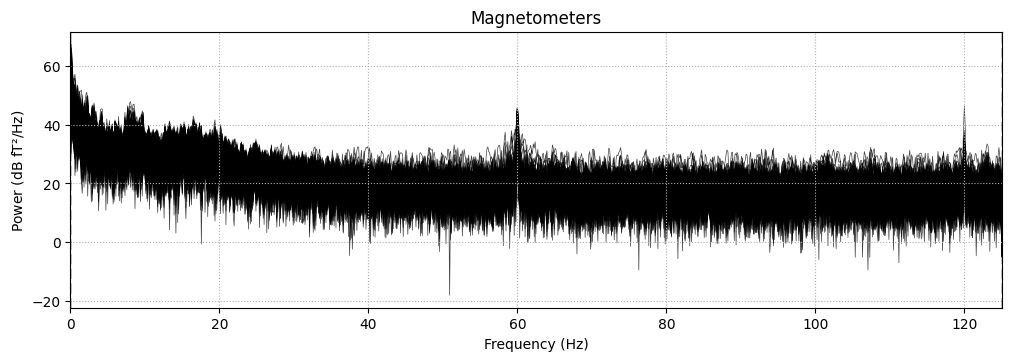

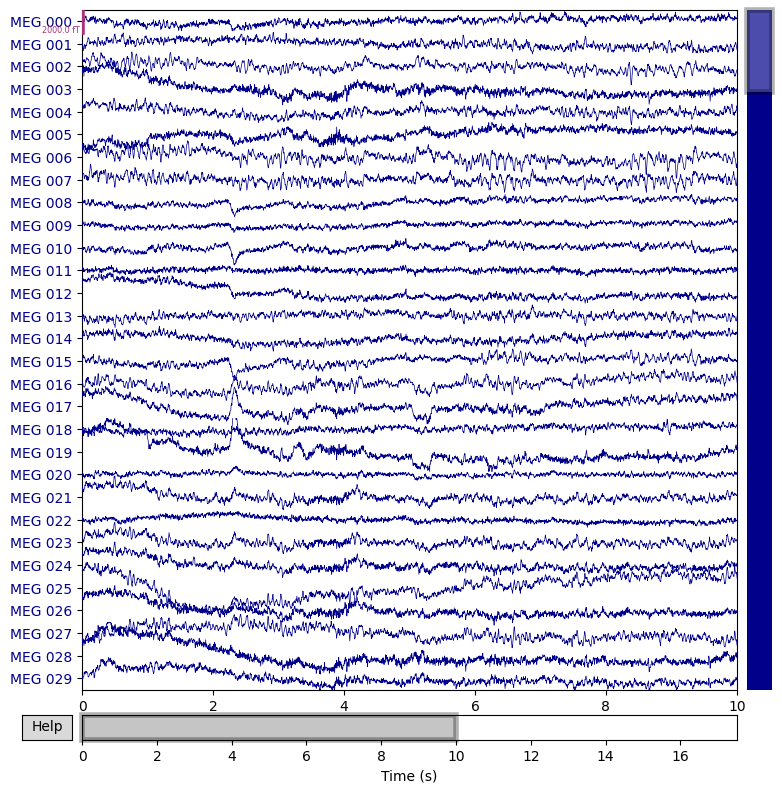

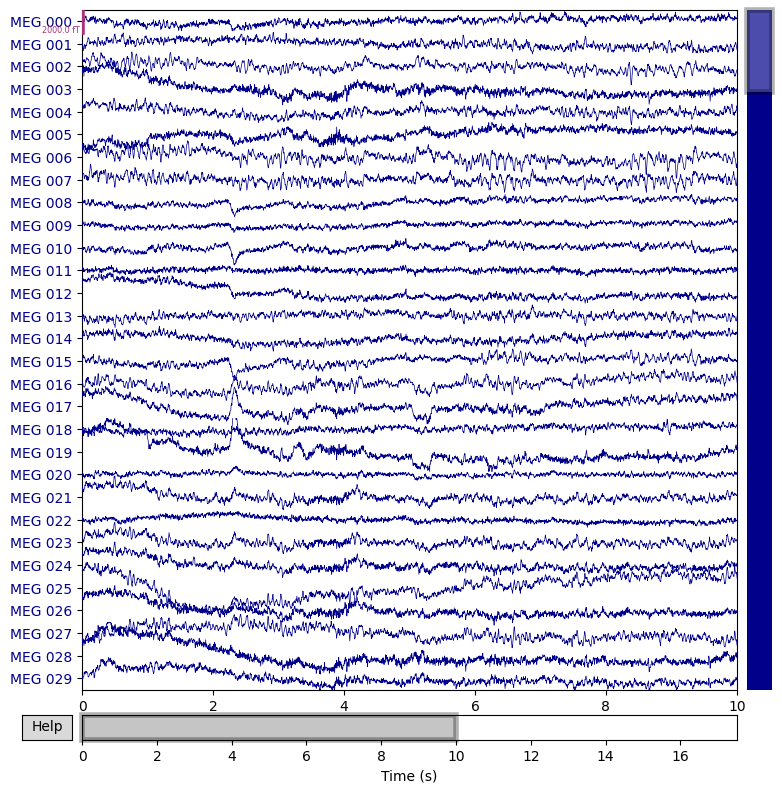

In [122]:
raw.compute_psd(fmax=125).plot(picks="data", amplitude=False)
raw.plot(n_channels=30)